# Klasifikatoriai

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
%matplotlib inline

In [9]:
heart = pd.read_csv('https://raw.githubusercontent.com/robotautas/kursas/master/Machine%20Learning/heart.csv')

In [10]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


![](https://www.indushealthplus.com/media/article_img/heart-attack-facts-awareness-thumb.jpg)

# Užduotis

Dirbsime su širdies ligų duomenimis. Turime lentelę, kurios kintamieji yra paciento duomenys ir klinikiniai rodikliai, o stulpelis target rodo, ar turi pacientas širdies ligą, ar ne. Išanalizuokite duomenis, ir sukurkite 4 modelius, kurie bandys 'diagnozuoti' širdies veiklos sutrikimus. Darbo eiga(apytikriai):
* importuokite bibliotekas, nuskaitykite csv failą (copy paste iš šio dokumento)
* išanalizuokite duomenis, atsispausdinkite keletą, jūsų nuomone, svarbių diagramų.
* patikrinkite, ar duomenyse yra trūkstamų reikšmių, jeigu yra, sutvarkykite.
* paruoškite duomenis modelio apmokymui
* apmokykite LogisticRegression, DecisionTree, RandomForests modelius, nustatykite jų efektyvumą, atsispausdinkite *confusion* matricas.
* pasidarykite lentelės kopiją, ir jos pagrindu paruoškite duomenis KNearestNeighbor klasifikatoriui.
* apmokykite KNN, nustatykite jo efektyvumą, atsispausdinkite *confusion* matricą.
* kuris modelis efektyviausias? Palyginkite *confusion* matricas, įvertinkite, kuri pozicija jose gali būti svarbesnė už patį modelio efektyvumą (hint hint - neteisingos diagnozės..)

Stulpelių paaiškinimai anglų kalba:

> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

*dėl medicinos terminų nesijaudinkite, mums tikrai nereikia visko suprasti :)*

In [12]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


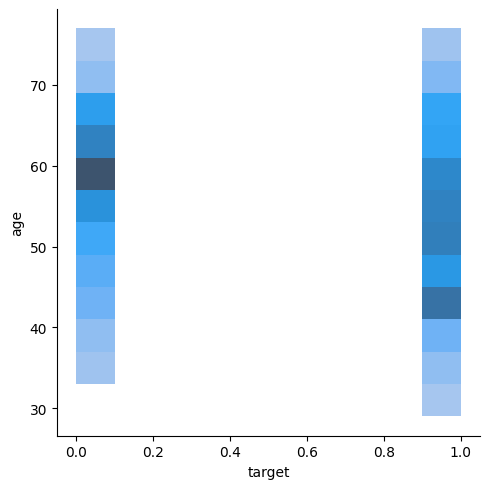

In [15]:
sns.displot(x='target', y='age', data=heart)

<Axes: ylabel='count'>

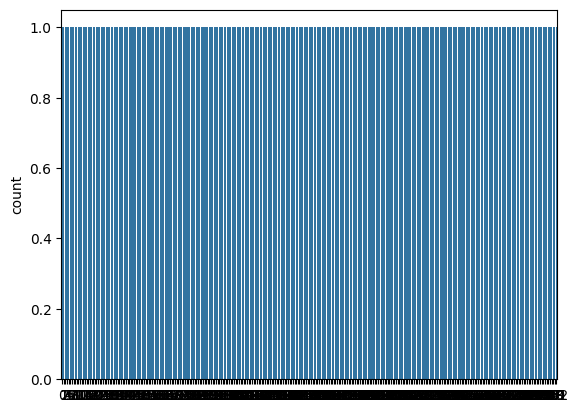

In [11]:
sns.countplot(heart['target'])

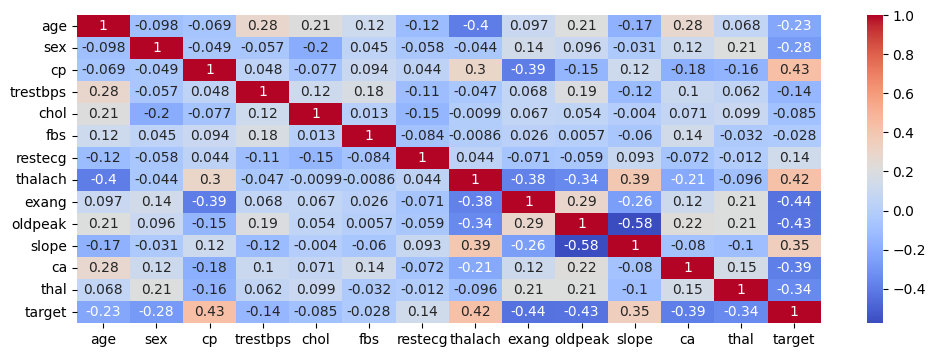

In [17]:
figure, axes = plt.subplots(figsize=(12, 4))
matrix = sns.heatmap(heart.corr(), annot=True, cmap='coolwarm')

In [18]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<Axes: xlabel='trestbps', ylabel='chol'>

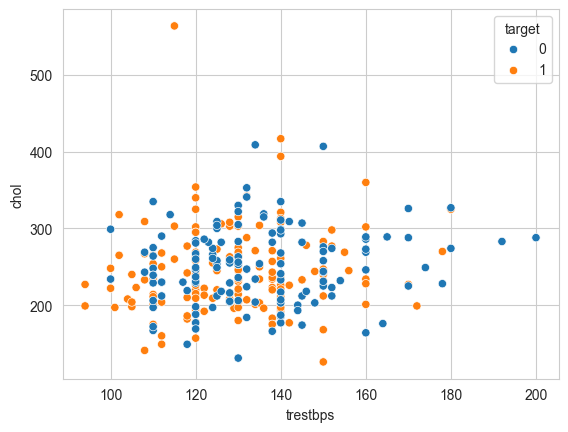

In [19]:
sns.set_style("whitegrid")
sns.scatterplot(x="trestbps", y="chol", data=heart, hue="target")

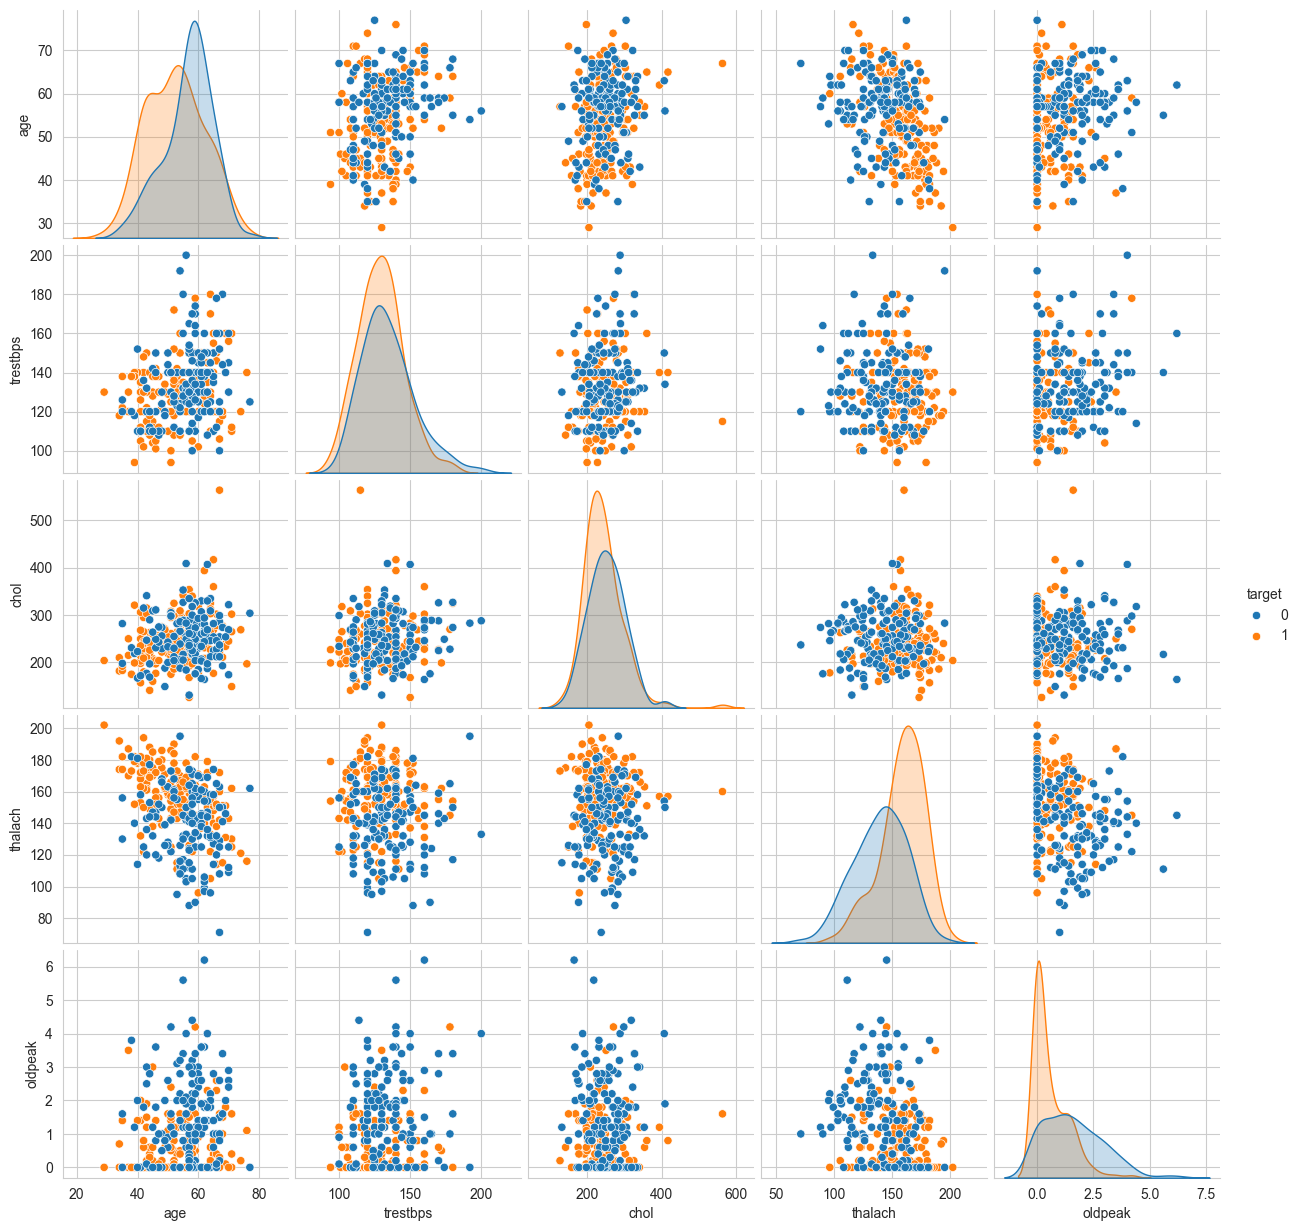

In [20]:
sns.pairplot(heart.drop(columns = ['sex', 'cp', 'fbs', 'restecg','exang', 'slope','ca', 'thal']), hue='target')

In [21]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [22]:
heart['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

In [24]:
heart['slope'].unique()

array([0, 2, 1], dtype=int64)

In [25]:
heart['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [26]:
heart['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [27]:
dummies_cp = pd.get_dummies(heart['cp'])
dummies_cp.columns = ['cp0', 'cp1', 'cp2', 'cp3']
dummies_slope = pd.get_dummies(heart['slope'])
dummies_slope.columns = ['slope0','slope1','slope2']
dummies_ca = pd.get_dummies(heart['ca'])
dummies_ca.columns = ['ca0', 'ca1', 'ca2', 'ca3', 'ca4']
dummies_thal = pd.get_dummies(heart['thal'])
dummies_thal.columns = ['thal0', 'thal1', 'thal2', 'thal3']

In [29]:
dumies = pd.concat([dummies_ca, dummies_cp, dummies_slope, dummies_thal], axis=1)
dumies.head()

,ca0,ca1,ca2,ca3,ca4,cp0,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,True,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False
1,True,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False
2,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
3,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False
4,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False


In [30]:
heart.drop(columns= ['ca', 'cp', 'slope', 'thal'], inplace= True)
df = pd.concat([heart, dumies], axis= 1)
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,1,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,1,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,1,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,1,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,1,...,False,False,False,False,False,True,False,False,True,False


In [31]:
x = df.drop('target', axis=1)
x.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca0,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,63,1,145,233,1,0,150,0,2.3,True,...,False,False,True,True,False,False,False,True,False,False
1,37,1,130,250,0,1,187,0,3.5,True,...,False,True,False,True,False,False,False,False,True,False
2,41,0,130,204,0,0,172,0,1.4,True,...,True,False,False,False,False,True,False,False,True,False
3,56,1,120,236,0,1,178,0,0.8,True,...,True,False,False,False,False,True,False,False,True,False
4,57,0,120,354,0,1,163,1,0.6,True,...,False,False,False,False,False,True,False,False,True,False


In [32]:
y = df['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.42, random_state=138)

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression().fit(x_train, y_train)

c:\Users\aivi1\CodeAcademy\course-python-basic-1\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
model.score(x_test, y_test)

0.875

In [46]:
lr_prediction = model.predict(x_test)
from sklearn.metrics import confusion_matrix
lr_con_mat = confusion_matrix(y_test, lr_prediction)
print(lr_con_mat)

[[45  9]
 [ 7 67]]


In [47]:
from sklearn.linear_model import LogisticRegression
model_newton_cg = LogisticRegression(solver='newton-cg').fit(x_train, y_train)

In [49]:
lr_new_preds = model_newton_cg.predict(x_test)
from sklearn.metrics import confusion_matrix
lr_newton_cm = confusion_matrix(y_test, lr_new_preds)
lr_newton_cm

array([[42, 12],
       [ 8, 66]], dtype=int64)

In [50]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier().fit(x_train, y_train)
decision_tree.score(x_test, y_test)

0.7734375

In [51]:
decision_tree_pred = decision_tree.predict(x_test)
decision_tree_cm = confusion_matrix(y_test, decision_tree_pred)
decision_tree_cm

array([[39, 15],
       [14, 60]], dtype=int64)

In [53]:
from sklearn.ensemble import RandomForestClassifier
random_forest_c = RandomForestClassifier(n_estimators=10000).fit(x_train, y_train)
random_forest_c.score(x_test, y_test)

0.8125

In [66]:
from sklearn.ensemble import RandomForestClassifier

def optimali_verte(state, est, x_train, y_train, x_test, y_test):
    list_of_dicts = []
    for s in range(state):
        index_value_pairs = {}
        for i in range(est):
            random_forest_c = RandomForestClassifier(n_estimators=i+1, random_state=s+1).fit(x_train, y_train)
            index_value_pairs[f'estimators:{i+1}'] = random_forest_c.score(x_test, y_test)
        list_of_dicts.append(index_value_pairs)
    return list_of_dicts


In [69]:
opt = optimali_verte(10, 10, x_train, y_train, x_test, y_test)

In [70]:
best_values = pd.DataFrame(opt).T
best_values.columns = columns = list(range(1, len(opt)+1))
best_values.head()

,1,2,3,4,5,6,7,8,9,10
estimators:1,0.750000,0.789062,0.742188,0.750000,0.750000,0.664062,0.703125,0.765625,0.742188,0.718750
estimators:2,0.687500,0.710938,0.718750,0.703125,0.750000,0.679688,0.656250,0.750000,0.687500,0.710938
estimators:3,0.757812,0.789062,0.828125,0.781250,0.750000,0.757812,0.710938,0.804688,0.750000,0.757812
estimators:4,0.773438,0.742188,0.796875,0.750000,0.734375,0.718750,0.718750,0.765625,0.781250,0.734375
estimators:5,0.804688,0.750000,0.820312,0.796875,0.789062,0.765625,0.757812,0.828125,0.789062,0.765625


In [71]:
best_values.max().idxmax()

9

In [72]:
best_values.idxmax()[9]

'estimators:9'

In [73]:
from sklearn.ensemble import RandomForestClassifier
random_forest_o = RandomForestClassifier(n_estimators=15, random_state=40).fit(x_train, y_train)
random_forest_o.score(x_test, y_test)

0.8203125

In [74]:
random_forest_pred = random_forest_o.predict(x_test)
random_forest_c = confusion_matrix(y_test, random_forest_pred)
random_forest_c

array([[44, 10],
       [13, 61]], dtype=int64)

In [75]:
y_test.value_counts()

target
1    74
0    54
Name: count, dtype: int64

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
scaler_features = scaler.transform(x)
scaler_features[:5]

array([[ 0.9521966 ,  0.68100522,  0.76395577, -0.25633371,  2.394438  ,
        -1.00583187,  0.01544279, -0.69663055,  1.08733806,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
        -0.44455422, -0.63464776,  3.4891135 ,  3.66450153, -0.92676626,
        -0.93914194, -0.08151391,  3.97911213, -1.10076284, -0.79311554],
       [-1.91531289,  0.68100522, -0.09273778,  0.07219949, -0.41763453,
         0.89896224,  1.63347147, -0.69663055,  2.12257273,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
        -0.44455422,  1.57567719, -0.28660575,  3.66450153, -0.92676626,
        -0.93914194, -0.08151391, -0.25131234,  0.9084609 , -0.79311554],
       [-1.47415758, -1.46841752, -0.09273778, -0.81677269, -0.41763453,
        -1.00583187,  0.97751389, -0.69663055,  0.31091206,  0.85523597,
        -0.52259855, -0.37867694, -0.26584089, -0.12953194, -0.94538352,
         2.24944438, -0.63464776, -0.28660575, -0

In [77]:
features = pd.DataFrame(scaler_features, columns=x.columns)
features.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca0,...,cp1,cp2,cp3,slope0,slope1,slope2,thal0,thal1,thal2,thal3
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,0.855236,...,-0.444554,-0.634648,3.489114,3.664502,-0.926766,-0.939142,-0.081514,3.979112,-1.100763,-0.793116
1,-1.915313,0.681005,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,0.855236,...,-0.444554,1.575677,-0.286606,3.664502,-0.926766,-0.939142,-0.081514,-0.251312,0.908461,-0.793116
2,-1.474158,-1.468418,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.855236,...,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
3,0.180175,0.681005,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.855236,...,2.249444,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116
4,0.290464,-1.468418,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.855236,...,-0.444554,-0.634648,-0.286606,-0.272888,-0.926766,1.064802,-0.081514,-0.251312,0.908461,-0.793116


In [80]:
from sklearn.neighbors import KNeighborsClassifier
xx_train, xx_test, yy_train, yy_test = train_test_split(features, y, test_size=0.37, random_state=98)
heart_knc = KNeighborsClassifier(n_neighbors=100).fit(xx_train, yy_train)
heart_knc.score(xx_test, yy_test)

0.8230088495575221

In [81]:
knc_pred = heart_knc.predict(xx_test)
knc_cm = confusion_matrix(yy_test, knc_pred)
knc_cm

array([[32, 16],
       [ 4, 61]], dtype=int64)

In [82]:
def find_optimal(neighbors):
    score_dict = {}
    for i in range(neighbors):
        knc_optimized = KNeighborsClassifier(n_neighbors=i+1).fit(xx_train, yy_train)
        score_dict.update({i+1: knc_optimized.score(xx_test, yy_test)})
    return score_dict

In [83]:
neighbors_dict = find_optimal(132)
max_sample = max(neighbors_dict, key=neighbors_dict.get)
max_sample

7

In [85]:
neighbors_dict[102]

0.8141592920353983

In [89]:
indexes = []
for k, v in neighbors_dict.items():
    if v == 0.8141592920353983:
        indexes.append(k)
indexes

[1,
 12,
 13,
 14,
 24,
 25,
 26,
 27,
 29,
 45,
 47,
 55,
 56,
 57,
 59,
 61,
 63,
 65,
 66,
 67,
 69,
 71,
 73,
 75,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 88,
 102,
 103,
 104,
 115,
 116]